<p style="text-align: center;"><font size="6">Capstone Project - The Battle of Neighborhoods in Paris</font></p>

# Table of Contents

* [Introduction](#Introduction)
* [Data Description](#Data-Description)
* [Methodology and Exploratory Data Analysis](#Methodology-and-Exploratory-Data-Analysis)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion and Perspectives](#Conclusion-and-Perspectives)
* [References](#References)

# Introduction

Paris is the French capital and most interesting city of France. There are 2,138,551 residents in an area of 105,7 square kilometres (40,7 square miles) [1].

According to the Economist Intelligence Unit Worldwide Cost of Living Survey in 2019, Paris was the second most expensive city in the world, after Singapore, Osaka, Hong Kong, and New York, and ahead of Zürich, Tokyo, and Los Angeles [2].

Indeed, we can found a huge number of restaurants which represents all types of cuisines in Paris. As you see from the above figures, **Paris** is one of the most interesting city to open a Moroccan restaurant. 

Concerning to the investors, we expect from them to prefer the districts in which there is a good community of the Arab's restaurant or Moroccan restaurant and the type of business they want to install is less intense.

Our problem is that there are several phases before proposing to the investors, for instance, 

+ to obtain the information of the most famous venues in Paris, 
+ to preprocessing the data (to clean, to normalize), 
+ to explore the preprocessed data,
+ to cluster the districts based on the top 10 venues for each district.

When we consider all above problems, we could illustrate the data in an information map where the district of Paris, the Moroccan restaurant and its neighborhood are clustered according to the venue density.

The aim of this project is to find the best borough out of 20 boroughs to open a **Moroccan restaurant** in Paris, France. 

The target audience of this report is anyone who is interested in opening a Moroccan restaurant but have no idea about the location.


# Data Description

#### Data Requirements:

The main districts in Paris are divided into 20 administrative districts, shortened to arrondissements.

The data regarding the districts in Paris needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the ideal district to open a Moroccan restaurant in Paris. 

Data for the arrondissements is necessary to select the most suitable of these areas for new Moroccan restaurant.

Initially looking to get this data by scraping the relevant Wikipedia page (https://en.wikipedia.org/wiki/Arrondissements_of_Paris), fortunately, after much research, this data is available on the web and can be manipulated and cleansed to provide a meaningful dataset to use.

Data from Open|DATA France: https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart

Also available from Opendatasoft: https://data.opendatasoft.com/explore/dataset/arrondissements%40parisdata/export/

#### Data Workflow:

* Outline the initial data that is required:
     - District data for Paris including names, location data if available, and any other details required.

* Obtain the Data:
     - Research and find suitable sources for the district data for Paris.
     - Access and explore the data to determine if it can be manipulated for our purposes.

* Initial Data Wrangling and Cleaning:
     - Clean the data and convert to a useable form as a dataframe.

# Methodology and Exploratory Data Analysis

* Data Analysis and Location Data:

    - Foursquare location data will be leveraged to explore or compare districts around Paris.
    - Data manipulation and analysis to derive subsets of the initial data.
    - Explore, segment and using *K*-Means as part of this clustering study [3] to cluster the neighborhoods in the city of Paris based on the top 10 venues for each neighborhood district. Moreover, we use the Elbow method to find out the optimal number of clusters for *K*-Means clustering.

* Visualization:

    - Use python folium package to visualize geographic details of Paris and its district neighborhood which are superimposed on top. 
    - Analyze the clustering results and then propose the ideal districts to open a Moroccan restaurant in Paris. And, we give some perspectives to enhance the performances.
    
* Discussion and Conclusions:

    - Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

#### Import the Required Libraries

In [2]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import requests # library to handle requests

!pip install beautifulsoup4
!pip install lxml

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

### Data Research and Preparation

In [3]:
# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repository for the project.
# https://raw.githubusercontent.com/naimnaoufal/Capstone-Project-The-Battle-of-Neighborhoods/master/arrondissements.csv

paris = pd.read_csv('https://raw.githubusercontent.com/naimnaoufal/Capstone-Project-The-Battle-of-Neighborhoods/master/arrondissements.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


### Exploring, Wrangling and Cleaning the Data

Let's rename the columns

In [4]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# Neighborhood : The name of the central neighborhood in the Arrondissement
# Arrondissement_Num : the Arrondissement number which is used to identify it

paris.rename(columns={'NAME': 'Neighborhood', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'Arrondissement_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,Arrondissement_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


Clean up the dataset to remove unnecessary columns

In [5]:
# Clean up the dataset to remove unnecessary columns.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,Arrondissement_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [6]:
# Check the shape of the dataframe
paris.shape

(20, 5)

### Using geopy library to get the latitude and longitude values of Paris

In [7]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


### Creating a map of Paris with neighborhoods superimposed on top

We use python **folium package** to visualize geographic details of Paris and its district neighborhood which are superimposed on top.

In [8]:
# create map of New York using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, arrondissement, neighborhood in zip(paris['Latitude'], paris['Longitude'], paris['Arrondissement_Name'], paris['Neighborhood']):
    label = '{}, {}'.format(neighborhood, arrondissement)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)
    
map_paris

### Define Foursquare Credentials and Version

In [42]:
# This code was removed

### Explore Neighborhoods in Paris

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
radius = 500
LIMIT = 100
paris_venues = getNearbyVenues(names=paris['Neighborhood'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

Temple
Buttes-Chaumont
Observatoire
Entrepot
Reuilly
Passy
Popincourt
Bourse
Hotel-de-Ville
Batignolles-Monceau
Buttes-Montmartre
Louvre
Pantheon
Palais-Bourbon
Menilmontant
elysee
Opera
Gobelins
Vaugirard
Luxembourg


Let's check the size of the resulting dataframe

In [12]:
print(paris_venues.shape)
paris_venues.head()

(1226, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Temple,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,Temple,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,Temple,48.862872,2.360001,Fromagerie Jouannault,48.862947,2.362530,Cheese Shop
3,Temple,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
4,Temple,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market


Let's check how many venues were returned for each neighborhood

In [13]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Batignolles-Monceau,55,55,55,55,55,55
Bourse,100,100,100,100,100,100
Buttes-Chaumont,43,43,43,43,43,43
Buttes-Montmartre,41,41,41,41,41,41
Entrepot,100,100,100,100,100,100
Gobelins,59,59,59,59,59,59
Hotel-de-Ville,100,100,100,100,100,100
Louvre,70,70,70,70,70,70
Luxembourg,39,39,39,39,39,39


#### Let's find out how many unique categories can be curated from all the returned venues

In [14]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 196 uniques categories.


### Analyze Each Neighborhood in Paris

In [15]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,Baby Store,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,EV Charging Station,Electronics Store,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Snack Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Temple,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Temple,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Temple,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [16]:
paris_onehot.shape

(1226, 197)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [17]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auvergne Restaurant,Baby Store,Bakery,Bar,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Canal,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Donut Shop,EV Charging Station,Electronics Store,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food & Drink Shop,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Photography Lab,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shopping Mall,Snack Place,South American Restaurant,Southwestern French Restaurant,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,Batignolles-Monceau,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.018182,0.000000,0.000000,0.000000,0.0000,0.000000,0.090909,0.018182,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.054545,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.000000,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.018182,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.00,0.000000,0.00,0.000000,0.018182,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.181818,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.163636,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.127273,0.090909,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.018182,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.0000,0.00,0.000000,0.000000,0.018182,0

In [18]:
paris_grouped.shape

(20, 197)

#### Let's print each neighborhood along with the top 5 most common venues

In [19]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
                 venue  freq
0    French Restaurant  0.18
1                Hotel  0.16
2   Italian Restaurant  0.13
3  Japanese Restaurant  0.09
4               Bakery  0.09


----Bourse----
               venue  freq
0  French Restaurant  0.13
1       Cocktail Bar  0.06
2           Wine Bar  0.06
3              Hotel  0.05
4             Bistro  0.03


----Buttes-Chaumont----
               venue  freq
0  French Restaurant  0.09
1                Bar  0.09
2        Pizza Place  0.05
3         Restaurant  0.05
4             Bistro  0.05


----Buttes-Montmartre----
               venue  freq
0                Bar  0.15
1  French Restaurant  0.12
2              Hotel  0.05
3  Convenience Store  0.05
4        Coffee Shop  0.05


----Entrepot----
               venue  freq
0  French Restaurant  0.13
1             Bistro  0.05
2              Hotel  0.05
3        Coffee Shop  0.05
4               Café  0.04


----Gobelins----
                   venue  freq
0  Vietnam

First, let's write a function to sort the venues in descending order.

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 25 venues for each neighborhood.

In [21]:
num_top_venues = 25

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Bistro,Café,Plaza,Concert Hall,Mediterranean Restaurant,Pizza Place,Diner,Portuguese Restaurant,Restaurant,Chinese Restaurant,Burger Joint,Pastry Shop,Art Museum,Bar,Turkish Restaurant,Donut Shop,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store
1,Bourse,French Restaurant,Wine Bar,Cocktail Bar,Hotel,Creperie,Bistro,Bakery,Italian Restaurant,Thai Restaurant,Cheese Shop,Pedestrian Plaza,Concert Hall,Salad Place,Indie Movie Theater,Ice Cream Shop,Women's Store,Farmers Market,Clothing Store,Restaurant,Burger Joint,Ramen Restaurant,Plaza,Pizza Place,Peruvian Restaurant,Perfume Shop
2,Buttes-Chaumont,French Restaurant,Bar,Pizza Place,Restaurant,Supermarket,Beer Bar,Seafood Restaurant,Bistro,Hotel,Music Store,Plaza,Music Venue,Canal,Steakhouse,Sandwich Place,Pharmacy,Burger Joint,Metro Station,Coffee Shop,Brewery,Spa,Creperie,Concert Hall,Café,Farmers Market
3,Buttes-Montmartre,Bar,French Restaurant,Convenience Store,Coffee Shop,Hotel,Restaurant,Seafood Restaurant,Supermarket,Bistro,Fast Food Restaurant,Middle Eastern Restaurant,Café,Sandwich Place,Beer Bar,Cheese Shop,Pool,Deli / Bodega,Pizza Place,Beer Store,Health Food Store,Mediterranean Restaurant,Gym / Fitness Center,Indian Restaurant,Italian Restaurant,Japanese Restaurant
4,Entrepot,French Restaurant,Hotel,Bistro,Coffee Shop,Indian Restaurant,Café,Japanese Restaurant,Pizza Place,Italian Restaurant,Seafood Restaurant,Breakfast Spot,Korean Restaurant,Burger Joint,Restaurant,Bar,Bakery,Mediterranean Restaurant,Asian Restaurant,African Restaurant,Wine Shop,Cocktail Bar,Lounge,Sandwich Place,Shanxi Restaurant,Cosmetics Shop
5,Gobelins,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Plaza,Furniture / Home Store,Creperie,Park,Coffee Shop,Cambodian Restaurant,Sandwich Place,Butcher,Bus Stop,Cosmetics Shop,Metro Station,Japanese Restaurant,Bakery,Italian Restaurant,Trail,Gourmet Shop,Convenience Store,Garden,Deli / Bodega
6,Hotel-de-Ville,French Restaurant,Ice Cream Shop,Clothing Store,Hotel,Garden,Plaza,Wine Bar,Pedestrian Plaza,Tea Room,Italian Restaurant,Seafood Restaurant,Pastry Shop,Park,Creperie,Cocktail Bar,Coffee Shop,Art Gallery,Gay Bar,Lyonese Bouchon,Salon / Barbershop,Burger Joint,Restaurant,Cultural Center,Café,Portuguese Restaurant
7,Louvre,French Restaurant,Japanese Restaurant,Plaza,Hotel,Italian Restaurant,Art Museum,Historic Site,Theater,Candy Store,Cheese Shop,Coffee Shop,Thai Restaurant,Udon Restaurant,Garden,Dessert Shop,Exhibit,Boutique,Museum,Cosmetics Shop,Pedestrian Plaza,Perfume Shop,Furniture / Home Store,General College & University,Restaurant,Bubble Tea Shop
8,Luxembourg,French Restaurant,Fountain,Bistro,Wine Bar,Italian Restaurant,Miscellaneous Shop,Lebanese Restaurant,Boutique,Outdoor Sculpture,Market,Shopping Mall,Electronics Store,Clothing Store,Dessert Shop,Deli / Bodega,Pub,Chocolate Shop,Plaza,Playground,Cocktail Bar,Pharmacy,Café,Pastry Shop,Supermarket,Garden
9,Menilmontant,Japanese Restaurant,Bakery,French Restaurant,Plaza,Bistro,Italian Restaurant,Bar,Café,Photography Lab,Lounge,Bookstore,Latin American Restaurant,Fast Food Restaurant,Street Art,Market,Mexican Restaurant,Roof Deck,Restaurant,Diner,Movie Theater,Pizza Place,Korean Restaurant,Brasserie,Park,Health Food Store


### Determine the optimal number of clusters for k-means clustering

The technique to determine K, the number of clusters, is called the **elbow method** [4].

In chart, we will plot:
+ values for K on the horizontal axis
+ the distortion or inertia on the Y axis which describe the values calculated by the cost function.

In order to determine the optimal number of clusters, we select the value of number of cluster at the "Elbow" in chart. Indeed, we choose the point whose distortion or inertia starts decreases in a linear fashion. 

In [22]:
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline

distortions = [] 
inertias = [] 
mapping_distortion = {} 
mapping_inertia = {} 
max_num_of_cluster = 16
list_of_num_of_cluster = range(1, max_num_of_cluster + 1)
X = paris_grouped.drop('Neighborhood', 1)

for k in list_of_num_of_cluster:
    #Building and fitting the model
    model = KMeans(n_clusters=k).fit(X)
    
    # Getting the distortion and inertia for each value of k
    tmp_distortion = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]
    tmp_inertia = model.inertia_
    
    distortions.append(tmp_distortion)
    inertias.append(tmp_inertia) 
  
    mapping_distortion[k] = tmp_distortion
    mapping_inertia[k] = tmp_inertia

#### Using the different values of Distortion

In [23]:
for key,val in mapping_distortion.items(): 
    print(str(key)+' : '+str(val))

1 : 0.1848129506938259
2 : 0.16971348746109494
3 : 0.1453368458262351
4 : 0.12835467375268178
5 : 0.11141102449587607
6 : 0.09989974102630654
7 : 0.0903100359749695
8 : 0.0847248633589329
9 : 0.07603646001106486
10 : 0.06827862877652008
11 : 0.06446051536677952
12 : 0.05434322502351839
13 : 0.04526690118833751
14 : 0.038749102666417415
15 : 0.03296281235823438
16 : 0.02454532669868818


Plot the Elbow Method using Distortion

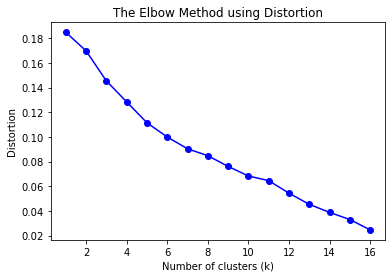

In [24]:
plt.plot(list_of_num_of_cluster, distortions, 'bo-') 
plt.xlabel('Number of clusters (k)') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

#### Using the different values of Inertia

In [25]:
for key,val in mapping_inertia.items(): 
    print(str(key)+' : '+str(val))

1 : 0.8470310615194248
2 : 0.7132825093816018
3 : 0.5096447156324828
4 : 0.40442579494261016
5 : 0.30186062447271855
6 : 0.2555327269055965
7 : 0.2105396050821982
8 : 0.18473376067947686
9 : 0.157534763547234
10 : 0.13645639985367686
11 : 0.12072975315227868
12 : 0.09971357004488934
13 : 0.08323763917267482
14 : 0.06710852415890071
15 : 0.054682835453666555
16 : 0.04031265639030567


Plot the Elbow Method using Inertia

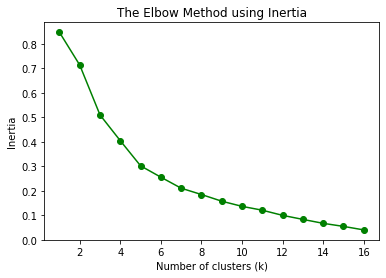

In [26]:
plt.plot(list_of_num_of_cluster, inertias, 'go-') 
plt.xlabel('Number of clusters (k)') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

**As you see from the above charts of the Elbow Method using the distortion or the inertia, the optimal number of clusters for our data is 8.**

### Cluster Neighborhoods in Paris

Run *k*-means to cluster the neighborhood into 8 clusters.

In [27]:
# set number of clusters
kclusters = 8

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 5, 7, 7, 5, 3, 5, 0, 5, 0], dtype=int32)

# Results

Let's create a new dataframe that includes the cluster labels as well as the top 25 venues for each neighborhood.

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = paris

# merge paris_grouped with paris_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged.head(10) # check the last columns!

,Arrondissement_Num,Neighborhood,Arrondissement_Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,3,Temple,3eme Ardt,48.862872,2.360001,5,French Restaurant,Japanese Restaurant,Gourmet Shop,Cocktail Bar,Art Gallery,Italian Restaurant,Burger Joint,Sandwich Place,Wine Bar,Coffee Shop,Bakery,Bistro,Garden,Clothing Store,Wine Shop,Vietnamese Restaurant,Hotel Bar,Tea Room,Cheese Shop,Restaurant,Chinese Restaurant,Chocolate Shop,Dessert Shop,Noodle House,Bubble Tea Shop
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821,7,French Restaurant,Bar,Pizza Place,Restaurant,Supermarket,Beer Bar,Seafood Restaurant,Bistro,Hotel,Music Store,Plaza,Music Venue,Canal,Steakhouse,Sandwich Place,Pharmacy,Burger Joint,Metro Station,Coffee Shop,Brewery,Spa,Creperie,Concert Hall,Café,Farmers Market
2,14,Observatoire,14eme Ardt,48.829245,2.326542,2,French Restaurant,Hotel,Bakery,Brasserie,Food & Drink Shop,Pizza Place,Bistro,Supermarket,Sushi Restaurant,EV Charging Station,Tea Room,Fast Food Restaurant,Convenience Store,Italian Restaurant,Department Store,Deli / Bodega,Falafel Restaurant,Exhibit,Corsican Restaurant,Cosmetics Shop,Coworking Space,Ethiopian Restaurant,Creperie,Cultural Center,Electronics Store
3,10,Entrepot,10eme Ardt,48.876130,2.360728,5,French Restaurant,Hotel,Bistro,Coffee Shop,Indian Restaurant,Café,Japanese Restaurant,Pizza Place,Italian Restaurant,Seafood Restaurant,Breakfast Spot,Korean Restaurant,Burger Joint,Restaurant,Bar,Bakery,Mediterranean Restaurant,Asian Restaurant,African Restaurant,Wine Shop,Cocktail Bar,Lounge,Sandwich Place,Shanxi Restaurant,Cosmetics Shop
4,12,Reuilly,12eme Ardt,48.834974,2.421325,1,Zoo Exhibit,Bike Rental / Bike Share,Monument / Landmark,Supermarket,Zoo,Argentinian Restaurant,Dive Bar,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store,EV Charging Station,Donut Shop,Diner,Flower Shop,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio,Cupcake Shop,Cultural Center,Creperie
5,16,Passy,16eme Ardt,48.860392,2.261971,4,Plaza,Park,Lake,Pool,Bus Station,French Restaurant,Art Museum,Bus Stop,Boat or Ferry,Bike Rental / Bike Share,Donut Shop,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store,EV Charging Station,Dessert Shop,Dive Bar,Diner,Fast Food Restaurant,Department Store,Deli / Bodega,Cycle Studio,Cupcake Shop,Cultural Center
6,11,Popincourt,11eme Ardt,48.859059,2.380058,5,French Restaurant,Supermarket,Restaurant,Wine Bar,Pastry Shop,Café,Pizza Place,Italian Restaurant,Bar,Bakery,Theater,Cocktail Bar,Japanese Restaurant,Performing Arts Venue,Bistro,Mediterranean Restaurant,Coffee Shop,South American Restaurant,Mexican Restaurant,Beer Garden,Breakfast Spot,Greek Restaurant,Sandwich Place,Ethiopian Restaurant,Korean Restaurant
7,2,Bourse,2eme Ardt,48.868279,2.342803,5,French Restaurant,Wine Bar,Cocktail Bar,Hotel,Creperie,Bistro,Bakery,Italian Restaurant,Thai Restaurant,Cheese Shop,Pedestrian Plaza,Concert Hall,Salad Place,Indie Movie Theater,Ice Cream Shop,Women's Store,Farmers Market,Clothing Store,Restaurant,Burger Joint,Ramen Restaurant,Plaza,Pizza Place,Peruvian Restaurant,Perfume Shop
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630,5,French Restaurant,Ice Cream Shop,Clothing Store,Hotel,Garden,Plaza,Wine Bar,Pedestrian Plaza,Tea Room,Italian Restaurant,Seafood Restaurant,Pastry Shop,Park,Creperie,Cocktail Bar,Coffee Shop,Art Gallery,Gay Bar,Lyonese Bouchon,Salon / Barbe

Finally, let's visualize the resulting clusters

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, arr, neigh, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Arrondissement_Name'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(arr) + ' ' + str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

### Examining Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 1

In [30]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
11,Louvre,0,French Restaurant,Japanese Restaurant,Plaza,Hotel,Italian Restaurant,Art Museum,Historic Site,Theater,Candy Store,Cheese Shop,Coffee Shop,Thai Restaurant,Udon Restaurant,Garden,Dessert Shop,Exhibit,Boutique,Museum,Cosmetics Shop,Pedestrian Plaza,Perfume Shop,Furniture / Home Store,General College & University,Restaurant,Bubble Tea Shop
12,Pantheon,0,French Restaurant,Italian Restaurant,Bakery,Hotel,Plaza,Pub,Coffee Shop,Science Museum,Café,Vietnamese Restaurant,Greek Restaurant,Garden,Pizza Place,Bistro,Historic Site,Bar,Wine Bar,Creperie,Museum,Hostel,Moroccan Restaurant,Portuguese Restaurant,Chocolate Shop,Park,Mexican Restaurant
14,Menilmontant,0,Japanese Restaurant,Bakery,French Restaurant,Plaza,Bistro,Italian Restaurant,Bar,Café,Photography Lab,Lounge,Bookstore,Latin American Restaurant,Fast Food Restaurant,Street Art,Market,Mexican Restaurant,Roof Deck,Restaurant,Diner,Movie Theater,Pizza Place,Korean Restaurant,Brasserie,Park,Health Food Store
18,Vaugirard,0,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Indian Restaurant,Supermarket,Bakery,Thai Restaurant,Japanese Restaurant,Park,Brasserie,Lebanese Restaurant,Cocktail Bar,Sushi Restaurant,Bistro,Persian Restaurant,Sports Bar,Moroccan Restaurant,Shoe Store,Scandinavian Restaurant,Irish Pub,Plaza,Basque Restaurant,Women's Store,Wine Shop


#### Cluster 2

In [31]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
4,Reuilly,1,Zoo Exhibit,Bike Rental / Bike Share,Monument / Landmark,Supermarket,Zoo,Argentinian Restaurant,Dive Bar,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store,EV Charging Station,Donut Shop,Diner,Flower Shop,Dessert Shop,Department Store,Deli / Bodega,Cycle Studio,Cupcake Shop,Cultural Center,Creperie


#### Cluster 3

In [32]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
2,Observatoire,2,French Restaurant,Hotel,Bakery,Brasserie,Food & Drink Shop,Pizza Place,Bistro,Supermarket,Sushi Restaurant,EV Charging Station,Tea Room,Fast Food Restaurant,Convenience Store,Italian Restaurant,Department Store,Deli / Bodega,Falafel Restaurant,Exhibit,Corsican Restaurant,Cosmetics Shop,Coworking Space,Ethiopian Restaurant,Creperie,Cultural Center,Electronics Store


#### Cluster 4

In [33]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
17,Gobelins,3,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Thai Restaurant,French Restaurant,Juice Bar,Plaza,Furniture / Home Store,Creperie,Park,Coffee Shop,Cambodian Restaurant,Sandwich Place,Butcher,Bus Stop,Cosmetics Shop,Metro Station,Japanese Restaurant,Bakery,Italian Restaurant,Trail,Gourmet Shop,Convenience Store,Garden,Deli / Bodega


#### Cluster 5

In [34]:
paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
5,Passy,4,Plaza,Park,Lake,Pool,Bus Station,French Restaurant,Art Museum,Bus Stop,Boat or Ferry,Bike Rental / Bike Share,Donut Shop,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store,EV Charging Station,Dessert Shop,Dive Bar,Diner,Fast Food Restaurant,Department Store,Deli / Bodega,Cycle Studio,Cupcake Shop,Cultural Center


#### Cluster 6

In [35]:
paris_merged.loc[paris_merged['Cluster Labels'] == 5, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
0,Temple,5,French Restaurant,Japanese Restaurant,Gourmet Shop,Cocktail Bar,Art Gallery,Italian Restaurant,Burger Joint,Sandwich Place,Wine Bar,Coffee Shop,Bakery,Bistro,Garden,Clothing Store,Wine Shop,Vietnamese Restaurant,Hotel Bar,Tea Room,Cheese Shop,Restaurant,Chinese Restaurant,Chocolate Shop,Dessert Shop,Noodle House,Bubble Tea Shop
3,Entrepot,5,French Restaurant,Hotel,Bistro,Coffee Shop,Indian Restaurant,Café,Japanese Restaurant,Pizza Place,Italian Restaurant,Seafood Restaurant,Breakfast Spot,Korean Restaurant,Burger Joint,Restaurant,Bar,Bakery,Mediterranean Restaurant,Asian Restaurant,African Restaurant,Wine Shop,Cocktail Bar,Lounge,Sandwich Place,Shanxi Restaurant,Cosmetics Shop
6,Popincourt,5,French Restaurant,Supermarket,Restaurant,Wine Bar,Pastry Shop,Café,Pizza Place,Italian Restaurant,Bar,Bakery,Theater,Cocktail Bar,Japanese Restaurant,Performing Arts Venue,Bistro,Mediterranean Restaurant,Coffee Shop,South American Restaurant,Mexican Restaurant,Beer Garden,Breakfast Spot,Greek Restaurant,Sandwich Place,Ethiopian Restaurant,Korean Restaurant
7,Bourse,5,French Restaurant,Wine Bar,Cocktail Bar,Hotel,Creperie,Bistro,Bakery,Italian Restaurant,Thai Restaurant,Cheese Shop,Pedestrian Plaza,Concert Hall,Salad Place,Indie Movie Theater,Ice Cream Shop,Women's Store,Farmers Market,Clothing Store,Restaurant,Burger Joint,Ramen Restaurant,Plaza,Pizza Place,Peruvian Restaurant,Perfume Shop
8,Hotel-de-Ville,5,French Restaurant,Ice Cream Shop,Clothing Store,Hotel,Garden,Plaza,Wine Bar,Pedestrian Plaza,Tea Room,Italian Restaurant,Seafood Restaurant,Pastry Shop,Park,Creperie,Cocktail Bar,Coffee Shop,Art Gallery,Gay Bar,Lyonese Bouchon,Salon / Barbershop,Burger Joint,Restaurant,Cultural Center,Café,Portuguese Restaurant
16,Opera,5,French Restaurant,Hotel,Cocktail Bar,Bakery,Bistro,Wine Bar,Lounge,Japanese Restaurant,Coffee Shop,Pizza Place,Bar,Café,Italian Restaurant,Plaza,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Gym / Fitness Center,Burger Joint,Falafel Restaurant,Latin American Restaurant,Sandwich Place,Scandinavian Restaurant,Chinese Restaurant,Gourmet Shop
19,Luxembourg,5,French Restaurant,Fountain,Bistro,Wine Bar,Italian Restaurant,Miscellaneous Shop,Lebanese Restaurant,Boutique,Outdoor Sculpture,Market,Shopping Mall,Electronics Store,Clothing Store,Dessert Shop,Deli / Bodega,Pub,Chocolate Shop,Plaza,Playground,Cocktail Bar,Pharmacy,Café,Pastry Shop,Supermarket,Garden


#### Cluster 7

In [36]:
paris_merged.loc[paris_merged['Cluster Labels'] == 6, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
9,Batignolles-Monceau,6,French Restaurant,Hotel,Italian Restaurant,Bakery,Japanese Restaurant,Bistro,Café,Plaza,Concert Hall,Mediterranean Restaurant,Pizza Place,Diner,Portuguese Restaurant,Restaurant,Chinese Restaurant,Burger Joint,Pastry Shop,Art Museum,Bar,Turkish Restaurant,Donut Shop,Falafel Restaurant,Exhibit,Ethiopian Restaurant,Electronics Store
13,Palais-Bourbon,6,Hotel,French Restaurant,Café,Italian Restaurant,Plaza,History Museum,Coffee Shop,Cocktail Bar,Historic Site,Garden,Bistro,Japanese Restaurant,Cheese Shop,Gourmet Shop,Irish Pub,Art Museum,Ice Cream Shop,Dessert Shop,Chocolate Shop,Restaurant,Diner,New American Restaurant,Mobile Phone Shop,Food & Drink Shop,Creperie
15,elysee,6,French Restaurant,Hotel,Spa,Art Gallery,Theater,Mediterranean Restaurant,Corsican Restaurant,Sporting Goods Shop,Resort,Plaza,Bar,Bakery,Thai Restaurant,Cocktail Bar,Japanese Restaurant,Grocery Store,Hotel Bar,Italian Restaurant,Art Museum,Modern European Restaurant,Park,Coworking Space,Ethiopian Restaurant,Electronics Store,EV Charging Station


#### Cluster 8

In [37]:
paris_merged.loc[paris_merged['Cluster Labels'] == 7, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue
1,Buttes-Chaumont,7,French Restaurant,Bar,Pizza Place,Restaurant,Supermarket,Beer Bar,Seafood Restaurant,Bistro,Hotel,Music Store,Plaza,Music Venue,Canal,Steakhouse,Sandwich Place,Pharmacy,Burger Joint,Metro Station,Coffee Shop,Brewery,Spa,Creperie,Concert Hall,Café,Farmers Market
10,Buttes-Montmartre,7,Bar,French Restaurant,Convenience Store,Coffee Shop,Hotel,Restaurant,Seafood Restaurant,Supermarket,Bistro,Fast Food Restaurant,Middle Eastern Restaurant,Café,Sandwich Place,Beer Bar,Cheese Shop,Pool,Deli / Bodega,Pizza Place,Beer Store,Health Food Store,Mediterranean Restaurant,Gym / Fitness Center,Indian Restaurant,Italian Restaurant,Japanese Restaurant


# Discussion

In the above results, we have the clustering of the various districts based on top 25 venues for each neighborhood.

As you see, the French Restaurant is the first most common venue in most of districts in Paris. 

When reviewing the clusters, we could see that the **Moroccan restaurant** is in cluster 1. Thus, the districts, which are clustered in **cluster 1**, are good location candidates. 

In summary, our proposed districts could be considered as one of the interesting starting points. In order to analyze more in details, we need to review the other relevantly important factors and conditions.

# Conclusion and Perspectives

## Conclusion

In conclusion, depending on the several requirements of the investors, if they would like to open new Moroccan restaurant in the district that have already had many Moroccan restaurants, they should open in **District 15 : Vaugirard**. 

In addition, they can open new one in **District 5 : Pantheon**, because there is also a good community for opening Moroccan restaurant in this district. 

Moreover, if the investors would like to open a new restaurant in the districts that are *similar to District 5 and 15*, they could locate it in the districts that are clustered in **Cluster 1** such as **District 1 (Louvre) and District 20 (Menilmontant) in Paris**.

## Perspectives

To enhance go further in the analysis, we could enhance the features of district by adding more relevant features for each district such as: 

+ the transport info (public transport, parking, etc.), 
+ the information of Moroccan and Arab communities, 
+ the information of major tourist venues.

Concerning the clustering methods and enhancing the performances, we could use some other algorithms, for instance:

+ FCM : Fuzzy c-means method
+ DBSCAN: Density-Based Spatial Clustering of Applications with Noise
+ Hierarchical K-Means Clustering
+ HCPC: Hierarchical clustering on principal components
+ Deep Learning Models. To see more details, please check "Unsupervised deep embedding for clustering analysis" - http://www.jmlr.org/proceedings/papers/v48/xieb16.pdf

# References

[1] Paris population, https://www.worldometers.info/world-population/france-population/

[2] The Economist Intelligence Unit, https://www.eiu.com/n/campaigns/worldwide-cost-of-living-2020

[3] The tutorials in course "Applied Data Science Capstone", https://www.coursera.org/learn/applied-data-science-capstone/

[4] Elbow Method for optimal value of k in KMeans, https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/